# Pixel classification in multi-channel images


In [1]:
from skimage.data import cells3d
from skimage.io import imshow, imsave, imread
import napari
import numpy as np
import apoc

C:\Users\johamuel\Anaconda3\envs\apoc\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
image = cells3d()

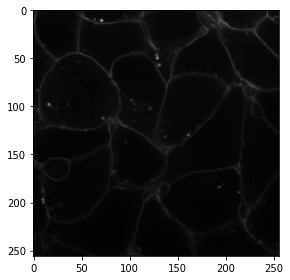

In [3]:
image_ch1 = image[30, 0]
imshow(image_ch1)

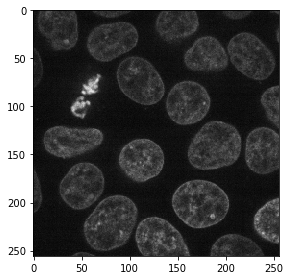

In [4]:
image_ch2 = image[30, 1]
imshow(image_ch2)

In [5]:
manual_annotation = False # change this if you want to annotate something yourself
if manual_annotation:
    viewer = napari.Viewer()
    
    viewer.add_image(image_ch1, blending='additive', colormap='green')
    viewer.add_image(image_ch2, blending='additive', colormap='magenta')
    
    annotation_layer = viewer.add_labels(np.zeros(image_ch1.shape).astype(int))

C:\Users\johamuel\Anaconda3\envs\apoc\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


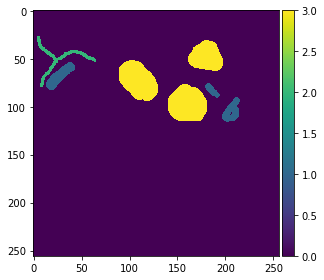

In [6]:
filename = 'cells_annotation.tif'
            
if manual_annotation:
    annotation = annotation_layer.data
    imsave(filename, annotation)
else:
    annotation = imread(filename)
imshow(annotation)

In [7]:
# define features: original image, a blurred version and an edge image
features = "original gaussian_blur=2 sobel_of_gaussian_blur=2"

# this is where the model will be saved
cl_filename = 'test.cl'

apoc.erase_classifier(cl_filename)
classifier = apoc.PixelClassifier(opencl_filename=cl_filename)
classifier.train(features=features, ground_truth=annotation, image=[image_ch1, image_ch2])


In [8]:
annotation.shape

(256, 256)

C:\Users\johamuel\Anaconda3\envs\apoc\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
C:\Users\johamuel\AppData\Local\Temp\ipykernel_24476\2170673470.py:4: UserWarning: cells_result.tif is a low contrast image
  imsave('cells_result.tif', result)


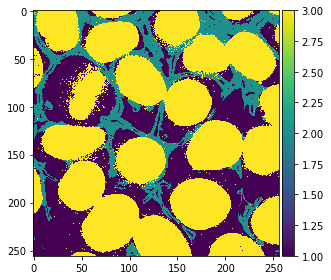

In [9]:
result = classifier.predict(image=[image_ch1, image_ch2])

imshow(result)
imsave('cells_result.tif', result)

## Inspecting a classifier

In some cases, it may be necessary or informative to inspect the classifer you are using. For instance, using multi-channel data for a classifier that was trained on a single channel or vice versa will lead to errors such as this:

In [10]:
classifier.predict(image=image_ch1)

RuntimeError: clBuildProgram failed: BUILD_PROGRAM_FAILURE - clBuildProgram failed: BUILD_PROGRAM_FAILURE - clBuildProgram failed: BUILD_PROGRAM_FAILURE

Build on <pyopencl.Device 'Intel(R) UHD Graphics' on 'Intel(R) OpenCL HD Graphics' at 0x203e11592b0>:

1:47:26: warning: unknown OpenCL extension 'cl_amd_printf' - ignoring
#pragma OPENCL EXTENSION cl_amd_printf : enable
                         ^
1:615:16: warning: implicit conversion from 'long long' to 'uint' (aka 'unsigned int') changes value from 18446744073709551615 to 4294967295
        return 18446744073709551615;
        ~~~~~~ ^~~~~~~~~~~~~~~~~~~~
1:625:16: warning: implicit conversion from 'long' to 'int' changes value from 9223372036854775807 to -1
        return 9223372036854775807;
        ~~~~~~ ^~~~~~~~~~~~~~~~~~~
1:628:16: warning: implicit conversion from 'long long' to 'int' changes value from -9223372036854775808 to 0
        return -9223372036854775808 ;
        ~~~~~~ ^~~~~~~~~~~~~~~~~~~~
1:652:84: error: unknown type name 'IMAGE_in3_TYPE'
__kernel void predict (IMAGE_in0_TYPE in0, IMAGE_in1_TYPE in1, IMAGE_in2_TYPE in2, IMAGE_in3_TYPE in3, IMAGE_in4_TYPE in4, IMAGE_in5_TYPE in5, IMAGE_out_TYPE out) {
                                                                                   ^
1:652:104: error: unknown type name 'IMAGE_in4_TYPE'
__kernel void predict (IMAGE_in0_TYPE in0, IMAGE_in1_TYPE in1, IMAGE_in2_TYPE in2, IMAGE_in3_TYPE in3, IMAGE_in4_TYPE in4, IMAGE_in5_TYPE in5, IMAGE_out_TYPE out) {
                                                                                                       ^
1:652:124: error: unknown type name 'IMAGE_in5_TYPE'
__kernel void predict (IMAGE_in0_TYPE in0, IMAGE_in1_TYPE in1, IMAGE_in2_TYPE in2, IMAGE_in3_TYPE in3, IMAGE_in4_TYPE in4, IMAGE_in5_TYPE in5, IMAGE_out_TYPE out) {
                                                                                                                           ^
1:660:13: error: implicit declaration of function 'READ_in3_IMAGE' is invalid in OpenCL
 float i3 = READ_IMAGE(in3, sampler, POS_in3_INSTANCE(x,y,z,0)).x;
            ^
1:637:27: note: expanded from macro 'READ_IMAGE'
#define READ_IMAGE(a,b,c) READ_ ## a ## _IMAGE(a,b,c)
                          ^
<scratch space>:57:1: note: expanded from here
READ_in3_IMAGE
^
1:660:38: error: implicit declaration of function 'POS_in3_INSTANCE' is invalid in OpenCL
 float i3 = READ_IMAGE(in3, sampler, POS_in3_INSTANCE(x,y,z,0)).x;
                                     ^
1:661:13: error: implicit declaration of function 'READ_in4_IMAGE' is invalid in OpenCL
 float i4 = READ_IMAGE(in4, sampler, POS_in4_INSTANCE(x,y,z,0)).x;
            ^
1:637:27: note: expanded from macro 'READ_IMAGE'
#define READ_IMAGE(a,b,c) READ_ ## a ## _IMAGE(a,b,c)
                          ^
<scratch space>:59:1: note: expanded from here
READ_in4_IMAGE
^
1:661:13: note: did you mean 'READ_in3_IMAGE'?
1:637:27: note: expanded from macro 'READ_IMAGE'
#define READ_IMAGE(a,b,c) READ_ ## a ## _IMAGE(a,b,c)
                          ^
<scratch space>:59:1: note: expanded from here
READ_in4_IMAGE
^
1:660:13: note: 'READ_in3_IMAGE' declared here
 float i3 = READ_IMAGE(in3, sampler, POS_in3_INSTANCE(x,y,z,0)).x;
            ^
1:637:27: note: expanded from macro 'READ_IMAGE'
#define READ_IMAGE(a,b,c) READ_ ## a ## _IMAGE(a,b,c)
                          ^
<scratch space>:57:1: note: expanded from here
READ_in3_IMAGE
^
1:661:38: error: implicit declaration of function 'POS_in4_INSTANCE' is invalid in OpenCL
 float i4 = READ_IMAGE(in4, sampler, POS_in4_INSTANCE(x,y,z,0)).x;
                                     ^
1:661:38: note: did you mean 'POS_in3_INSTANCE'?
1:660:38: note: 'POS_in3_INSTANCE' declared here
 float i3 = READ_IMAGE(in3, sampler, POS_in3_INSTANCE(x,y,z,0)).x;
                                     ^
1:637:52: note: expanded from macro 'READ_IMAGE'
#define READ_IMAGE(a,b,c) READ_ ## a ## _IMAGE(a,b,c)
                                                   ^
1:662:13: error: implicit declaration of function 'READ_in5_IMAGE' is invalid in OpenCL
 float i5 = READ_IMAGE(in5, sampler, POS_in5_INSTANCE(x,y,z,0)).x;
            ^
1:637:27: note: expanded from macro 'READ_IMAGE'
#define READ_IMAGE(a,b,c) READ_ ## a ## _IMAGE(a,b,c)
                          ^
<scratch space>:61:1: note: expanded from here
READ_in5_IMAGE
^
1:662:38: error: implicit declaration of function 'POS_in5_INSTANCE' is invalid in OpenCL
 float i5 = READ_IMAGE(in5, sampler, POS_in5_INSTANCE(x,y,z,0)).x;
                                     ^

(options: -I C:\Users\johamuel\Anaconda3\envs\apoc\lib\site-packages\pyopencl\cl)
(source saved as C:\Users\johamuel\AppData\Local\Temp\tmpoccl_qz_.cl)

To avoid this issue, we can print the classifier info to see which dimensions the classifer expects for the prediction.

Note: For the classifier to work on new data, only the first dimension needs to match. In other words:

- A classifer trained on a `[2, 256, 256]` image will work for new data with dimensions `[2, 512, 512]`
- A classifer trained on a `[2, 256, 256]` image will **not** work for new data with dimensions `[1, 256, 256]`

To obtain all information about the used classifier, you can simply print it like this:

In [11]:
print(classifier)

Classifier type: PixelClassifier
--- Random forest info ---
Used features for training: original gaussian_blur=2 sobel_of_gaussian_blur=2
Training data dimensions: [2 x X x Y]
Maximum depth: 2
Number of ensembles: 100
Number of classes:  3


# Loading a classifier from file

If you want to inspect a classifier from a saved classifier file (`my_classifier.clf)`, you can do this as follows:

In [12]:
with open(cl_filename) as f:
    lines = f.readlines()

content = "\n".join(lines)
print(content.split("*/")[0])

/*

OpenCL RandomForestClassifier

classifier_class_name = PixelClassifier

feature_specification = original gaussian_blur=2 sobel_of_gaussian_blur=2

num_ground_truth_dimensions = 2

num_classes = 3

num_features = 6

max_depth = 2

num_trees = 100

apoc_version = 0.8.0




Using utility functions, you can also read out individual lines from the header. Note: These are [private functions]() which are subject to change. If your code breaks when using them, please come back to this notebook and see how it was updated.

In [13]:
apoc._utils._read_something_from_opencl_file(cl_filename, "num_ground_truth_dimensions = ")

'2'